In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
im = Image.open('/Users/bharatv007/Desktop/image.jpg')

# To black and white ? 2 channel
thresh = 100
fn = lambda x : 255 if x > thresh else 0
r = im.convert('L').point(fn, mode='1')

im = np.array(r) # To single channel
img_arr = np.expand_dims(im, axis=0)
shp = img_arr.shape
shp

(1, 540, 720)

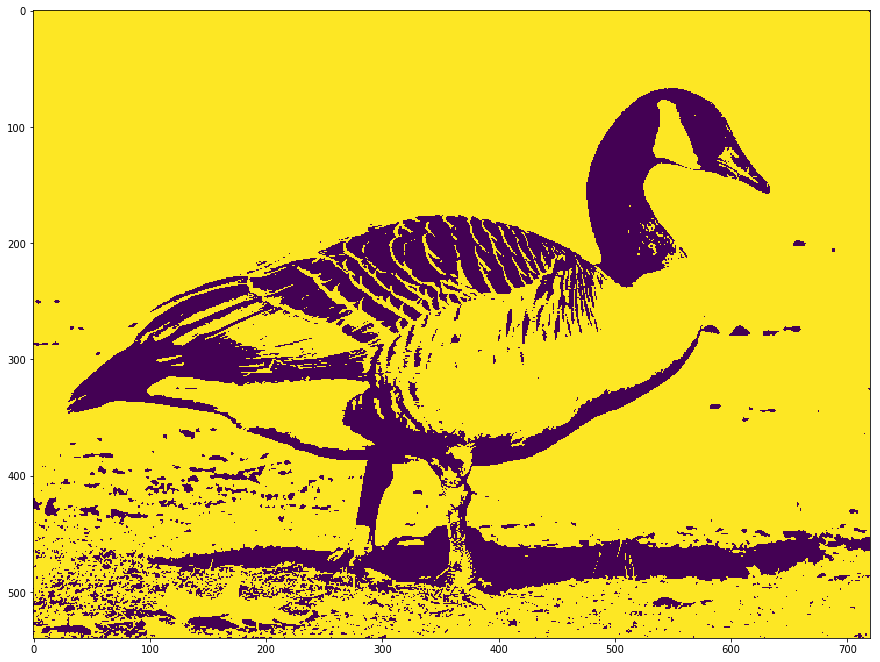

In [3]:
plt.figure(figsize = (15,15))
plt.imshow(im)

In [2]:
# Check: https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python

s, k = 1, 2 #  generate a (2k+1)x(2k+1) gaussian kernel with mean=0 and sigma = s
probs = [np.exp(-z*z/(2*s*s))/np.sqrt(2*np.pi*s*s) for z in range(-k,k+1)] 
gaussian_kernel = np.outer(probs, probs)
gaussian_kernel

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

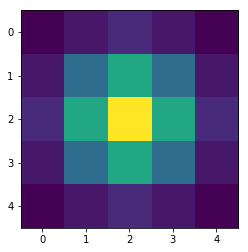

In [5]:
plt.imshow(gaussian_kernel)

In [6]:
gaussian_kernel = np.expand_dims(np.expand_dims(gaussian_kernel, 2), 3)

In [7]:
gaussian_kernel.shape

(5, 5, 1, 1)

In [8]:
img_arr = np.expand_dims(img_arr, axis=3)
img_arr.shape

(1, 540, 720, 1)

In [9]:
# TF-Graph

img = tf.placeholder(dtype=tf.float32, shape=(1, 540, 720, 1))
g_filter = tf.placeholder(dtype=tf.float32, shape=(5, 5, 1, 1))

result = tf.nn.conv2d(img, filter=g_filter, strides=[1, 1, 1, 1], padding='SAME')
result

<tf.Tensor 'Conv2D:0' shape=(1, 540, 720, 1) dtype=float32>

In [10]:
with tf.Session() as sess:
    output_img = sess.run(result, feed_dict={img: img_arr, g_filter: gaussian_kernel})

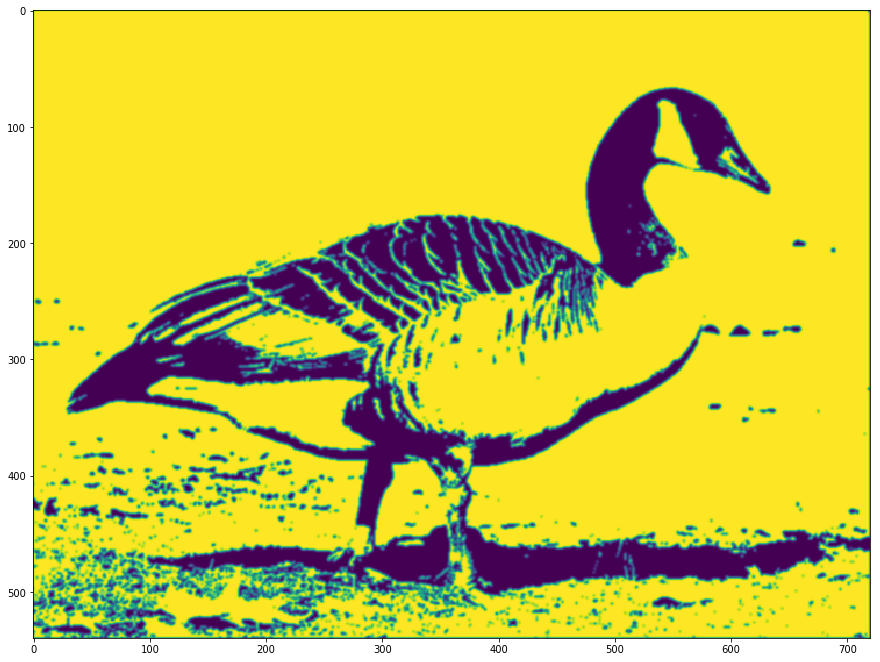

In [11]:
plt.figure(figsize = (15,15))
plt.imshow(output_img.reshape((540, 720)))